Excercise sheet 1
===
Machine Inteliigence 2, SoSe 2016, The Nebenhörers:
---

Danijar Hafner

Thomas Kellermeier

Patrick Kuhn

Jan Szynal

In [33]:
import random
import itertools
import numpy as np
import pandas as pd
from scipy import ndimage
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Excercise 1.1
---

In [34]:
def plot_dataframe(ax, data, title):
    ax.matshow(data)
    ax.set_title(title)
    ax.set_xticks(range(len(data.columns)))
    ax.set_xticklabels(data.columns, rotation=90)
    ax.set_yticks(range(len(data.columns)))
    ax.set_yticklabels(data.columns)

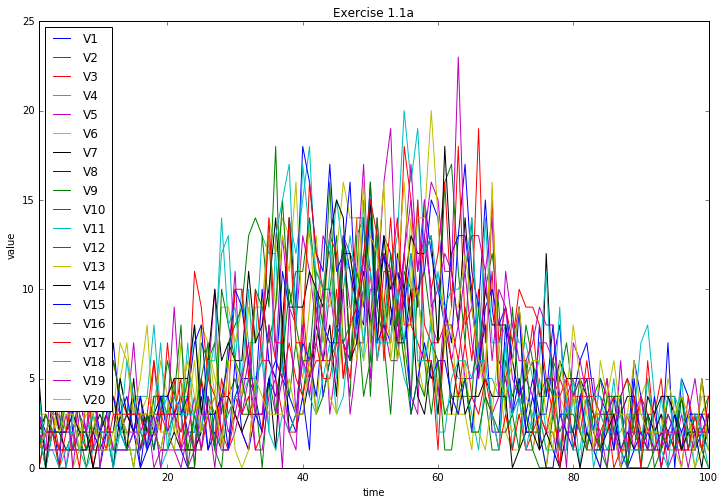

In [35]:
dataframe = pd.read_csv('expDat.txt', index_col=0)
ax = dataframe.plot(figsize=(12, 8), title='Exercise 1.1a')
ax.set_xlabel('time')
ax.set_ylabel('value')

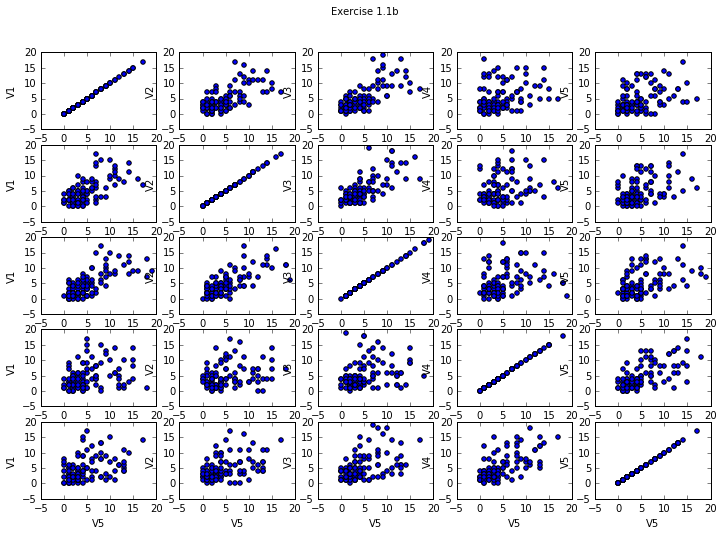

In [36]:
fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(12, 8))
fig.suptitle('Exercise 1.1b')
for x, y in itertools.product(range(5), repeat=2):
    dataframe.plot(subplots=True, kind='scatter', x=x, y=y, ax=ax[x, y])

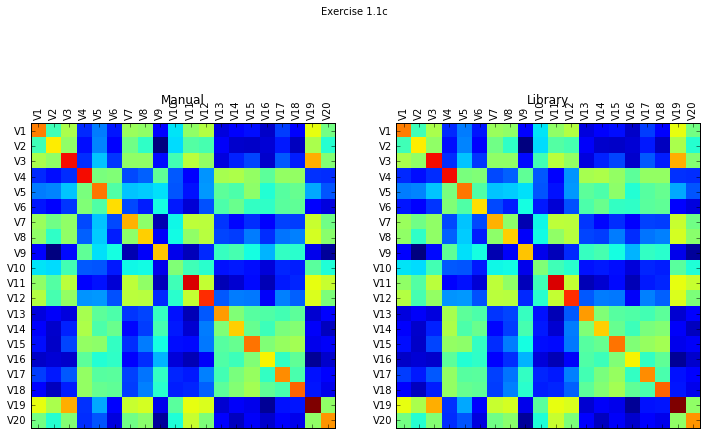

In [37]:
centered = dataframe - dataframe.mean()
cov = centered.T.dot(centered) / len(centered)
fig, ax = plt.subplots(ncols=2, figsize=(12, 8))

fig.suptitle('Exercise 1.1c')
plot_dataframe(ax[0], cov, 'Manual')
plot_dataframe(ax[1], dataframe.cov(), 'Library')

plt.show()

Excercise 1.2
---

In [45]:
dataframe = pd.read_csv('pca-data-3d.txt')
dataframe.describe()

,x,y,z
count,500.000000,500.000000,500.000000
mean,0.043555,0.091908,-0.059460
std,0.965748,1.345888,2.094110
min,-2.728321,-3.487070,-3.061867
25%,-0.658242,-0.840618,-2.045611
50%,0.055413,0.140944,-0.150139
75%,0.711236,0.985253,2.028950
max,2.303785,3.836981,3.028818


In [49]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
fig.suptitle('Exercise 1.2a')
for x, y in itertools.product(range(3), repeat=2):
    dataframe.plot(subplots=True, kind='scatter', x=x, y=y, ax=ax[x, y])


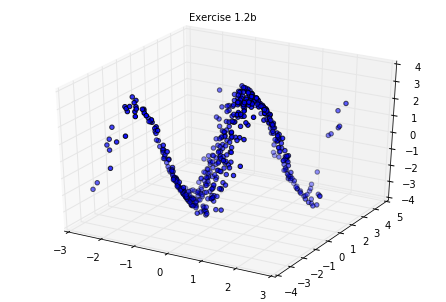

In [39]:
fig = plt.figure()
ax = Axes3D(fig)
fig.suptitle('Exercise 1.2b')
data = np.array(dataframe)
ax.scatter(data[:, 0], data[:, 1], data[:, 2])

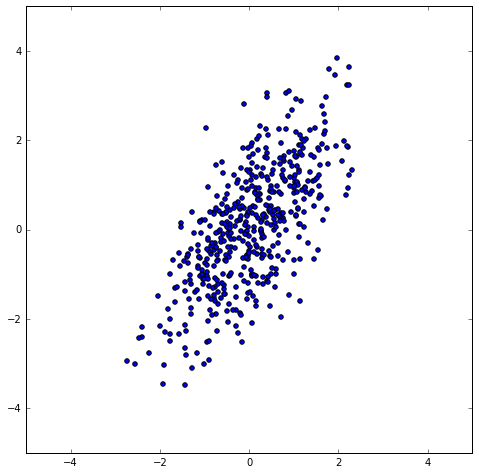

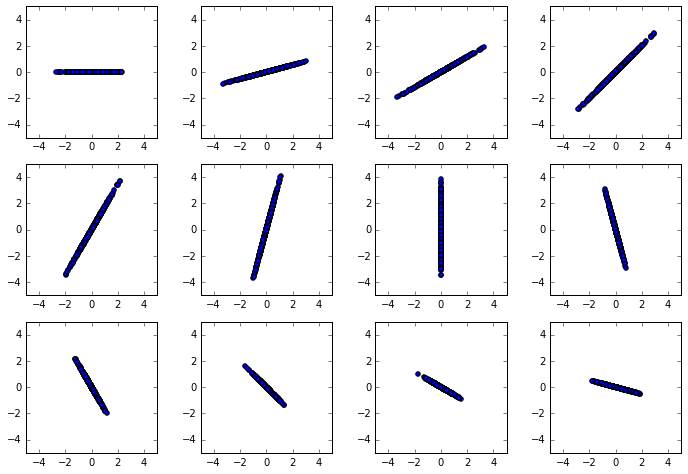

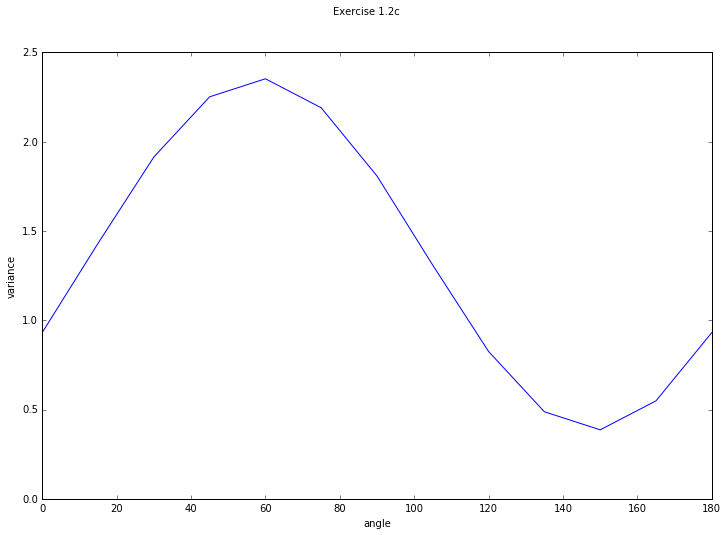

In [51]:
def direction(degrees):
    radians = 2 * np.pi * degrees / 360
    return np.array([np.cos(radians), np.sin(radians)])
    
points = data[:, :2]
lim = -5, 5

fig, ax = plt.subplots(figsize=(12, 8),
    subplot_kw={'xlim': lim, 'ylim': lim, 'aspect': 'equal'})
ax.scatter(points[:, 0], points[:, 1])

fig, ax = plt.subplots(
    ncols=4, nrows=3, figsize=(12, 8),
    subplot_kw={'xlim': lim, 'ylim': lim, 'aspect': 'equal'})
angles = np.arange(0, 180, 15)

projections = []
for index, angle in np.ndenumerate(angles.reshape((3, 4))):
    vector = direction(angle)
    projected = points.dot(vector)
    projections.append(projected)
    xs = projected * vector[0]
    ys = projected * vector[1]
    ax[index].scatter(xs, ys)

variances = [(x - x.mean()) ** 2  for x in projections]
variances = [x.sum() / len(x) for x in variances]
fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle('Exercise 1.2c')
ax.plot(angles.tolist() + [180], variances + [variances[0]])
ax.set_xlabel('angle')
ax.set_ylabel('variance')
    
plt.show()

Excercise 1.3
---

In [41]:
def sample_window(data, size):
    x = int(random.random() * (data.shape[0] - size))
    y = int(random.random() * (data.shape[1] - size))
    return data[x: x + size, y : y + size]

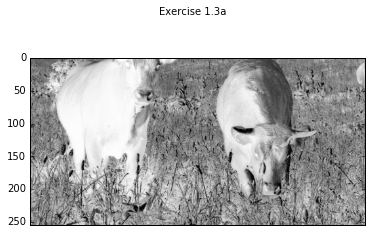

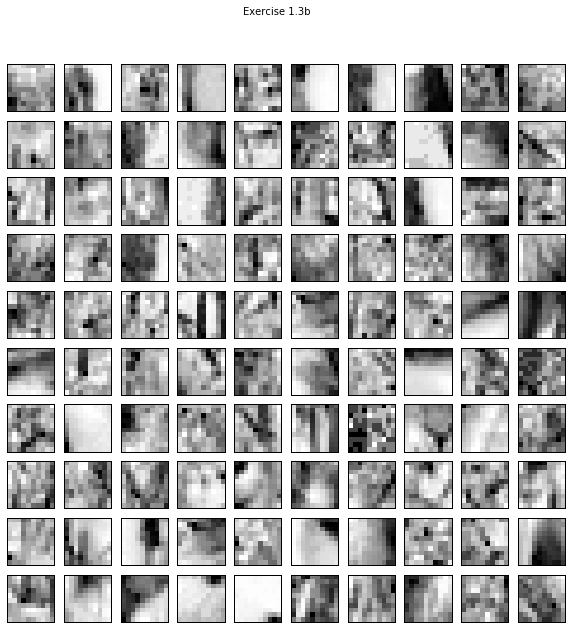

In [57]:
image = ndimage.imread('natIMG.jpg')

fig, ax = plt.subplots()
ax.get_xaxis().set_visible(False)
fig.suptitle('Exercise 1.3a')
ax.imshow(image, cmap=plt.cm.gray_r)

fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(10, 10),
                       subplot_kw={'xticks': [], 'yticks': []})
fig.suptitle('Exercise 1.3b')
for x, y in itertools.product(range(10), repeat=2):
    window = sample_window(image, size=10)
    ax[x, y].imshow(window, cmap=plt.cm.gray_r, interpolation='nearest')

plt.show()
